### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [16]:
wholesale = pd.read_csv('Wholesale Customers Data.csv')
wholesale

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [4]:
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [30]:
wholesale.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


### Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [9]:
wholesale.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [22]:
wholesale[['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Channel').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [17]:
Channel = wholesale[['Channel','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Channel').sum().transpose().sum()
print(Channel)

Channel
Hotel     7999569
Retail    6619931
dtype: int64


In [23]:
wholesale[['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Region').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [18]:
Region = wholesale[['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].groupby('Region').sum().transpose().sum()
Region

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
dtype: int64

Do all varieties show similar behaviour across Region and Channel?  Provide justification for your answer

In [54]:
wholesale.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
wholesale.loc[wholesale['Channel'] == 'Hotel'].describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
std,120.910343,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922
min,4.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,137.250000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000
50%,241.500000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000
75%,344.500000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000
max,440.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000


In [6]:
wholesale.loc[wholesale['Channel'] == 'Retail'].describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620
std,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047
min,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000
25%,61.250000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000
50%,166.500000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000
75%,303.750000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000
max,438.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000


In [36]:
wholesale.loc[wholesale['Region'] == 'Lisbon'].describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
std,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340
min,197.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000
25%,216.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000
50%,235.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000
75%,254.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000
max,273.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000


In [37]:
wholesale.loc[wholesale['Region'] == 'Oporto'].describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
std,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841
min,294.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000
25%,305.500000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000
50%,317.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000
75%,328.500000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000
max,340.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000


In [40]:
wholesale.loc[wholesale['Region'] == 'Other'].describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266
std,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,79.750000,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000
50%,158.500000,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000
75%,361.250000,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000
max,440.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000


### On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

### outliers in the data?

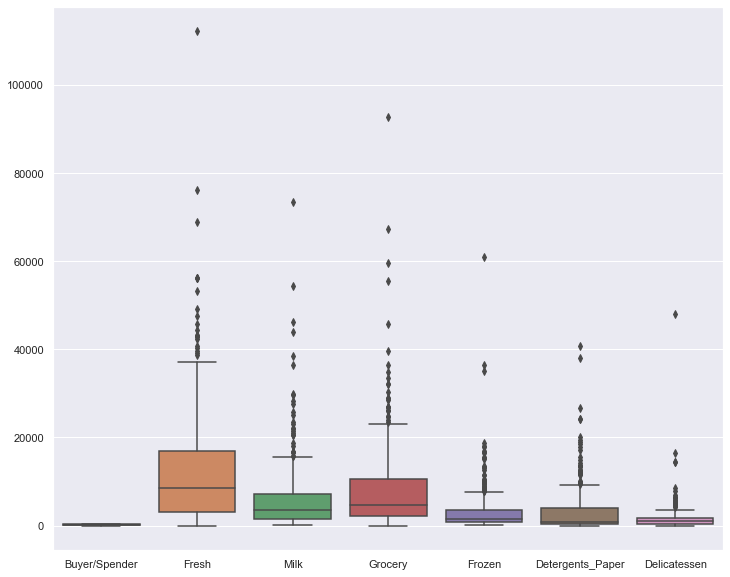

In [60]:
plt.figure(figsize=(12,10))
sns.boxplot( data=wholesale);